In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = "/Users/brewaterman/Desktop/KSGWChemData"
df = pd.read_csv(file, sep='\t', comment='#')
data = df.drop(0)
data.head(5)

,agency_cd,site_no,sample_dt,sample_tm,sample_end_dt,sample_end_tm,sample_start_time_datum_cd,tm_datum_rlbty_cd,coll_ent_cd,medium_cd,...,r00300,p00300,r00400,p00400,r00618,p00618,r00945,p00945,r01045,p01045
1,USGS,370056094511101,1981-11-19,14:00,NaN,NaN,CST,T,NaN,WG,...,NaN,NaN,NaN,7.1,NaN,0.00,NaN,480,NaN,NaN
2,USGS,370107094462401,1981-12-07,11:00,NaN,NaN,CST,T,NaN,WG,...,NaN,7.0,NaN,3.1,NaN,0.00,NaN,1300,NaN,NaN
3,USGS,370107094462401,1981-12-07,11:30,NaN,NaN,CST,T,NaN,WG,...,NaN,1.2,NaN,2.2,NaN,0.00,NaN,3000,NaN,NaN
4,USGS,370109094510701,1981-08-13,15:00,NaN,NaN,CDT,T,NaN,WG,...,NaN,NaN,NaN,7.0,NaN,0.10,NaN,170,NaN,NaN
5,USGS,370109094510701,1981-11-19,16:30,NaN,NaN,CST,T,NaN,WG,...,NaN,NaN,NaN,6.7,NaN,0.20,NaN,180,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 73
Data columns (total 24 columns):
agency_cd                     73 non-null object
site_no                       73 non-null object
sample_dt                     73 non-null object
sample_tm                     73 non-null object
sample_end_dt                 0 non-null object
sample_end_tm                 0 non-null object
sample_start_time_datum_cd    73 non-null object
tm_datum_rlbty_cd             73 non-null object
coll_ent_cd                   20 non-null object
medium_cd                     73 non-null object
tu_id                         0 non-null object
body_part_id                  0 non-null object
r00003                        0 non-null object
p00003                        73 non-null object
r00300                        0 non-null object
p00300                        18 non-null object
r00400                        0 non-null object
p00400                        73 non-null object
r00618                

In [5]:
data = data.astype({"p00003" : float,
                           "p00300" : float,
                           "p00618" : float})

level_date = pd.to_datetime(data["sample_dt"])

data.insert(2, "Sample date", level_date)

In [37]:
gwdata = data[["site_no", "Sample date", "p00003", "p00300","p00618"]]
gwdata.rename(columns={"p00003":"depth",
                        "p00300" :"O2",
                         "p00618":"NO3"}, 
                 inplace=True)
gwdata.head(5)

,site_no,Sample date,depth,O2,NO3
1,370056094511101,1981-11-19,110.0,NaN,0.0
2,370107094462401,1981-12-07,70.0,7.0,0.0
3,370107094462401,1981-12-07,90.0,1.2,0.0
4,370109094510701,1981-08-13,61.0,NaN,0.1
5,370109094510701,1981-11-19,100.0,NaN,0.2


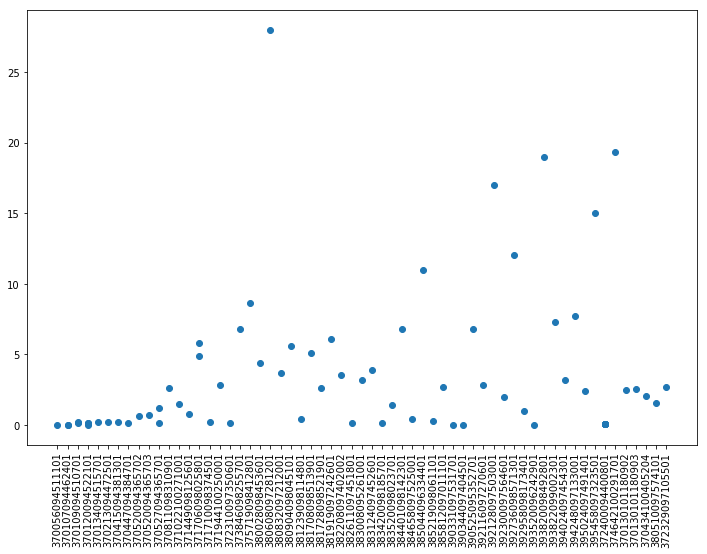

In [38]:
plt.figure(figsize =(12,8))
plt.scatter(gwdata["site_no"], gwdata["NO3"])
plt.xticks(rotation = "90")

plt.show()

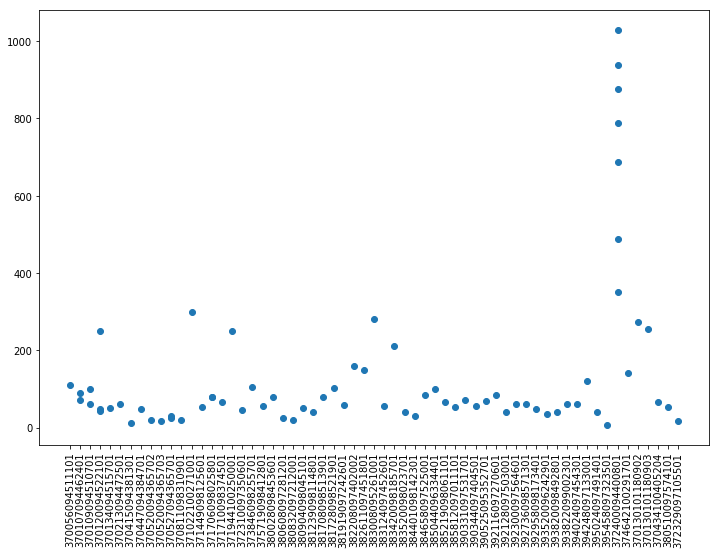

In [46]:
plt.figure(figsize =(12,8))
plt.scatter(gwdata["site_no"], gwdata["depth"])
plt.xticks(rotation = "90")

plt.show()

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

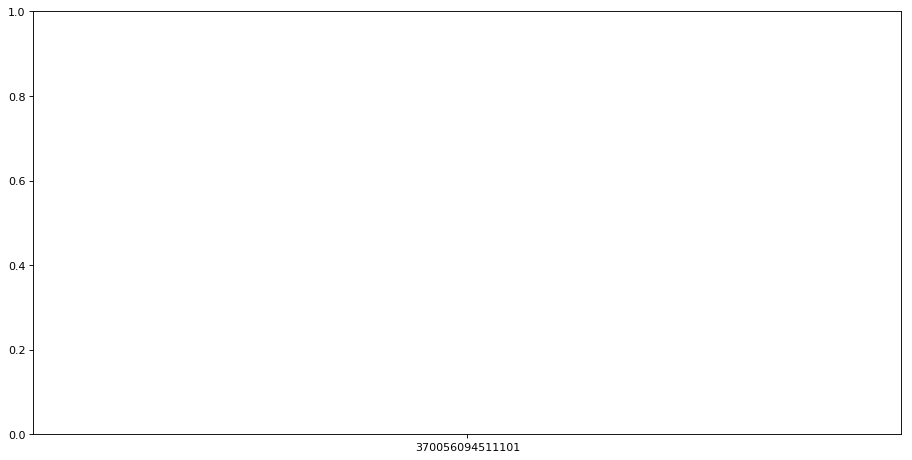

In [54]:
plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('site_no', 'depth', data=gwdata, s='dot_size', c='NO3', cmap='blue', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Site number', fontsize=18)
plt.ylabel('Depth', fontsize=18)
plt.colorbar()
plt.show() 

In [9]:
codes = "/Users/brewaterman/Desktop/Geomicrobio/pmcodes"
df_codes = pd.read_csv(codes, sep='\t', comment='#')
pm = df_codes.drop(0)
pm.head(5)

,parameter_cd,parameter_group_nm,parameter_nm,casrn,srsname,parameter_units
1,00001,Information,"Location in cross section, distance from right...",NaN,NaN,ft
2,00002,Information,"Location in cross section, distance from right...",NaN,NaN,%
3,00003,Information,"Sampling depth, feet",NaN,NaN,ft
4,00005,Information,"Location in cross section, fraction of total d...",NaN,NaN,%
5,00008,Information,Sample accounting number,NaN,NaN,nu


In [10]:
pmcodes = pm[["parameter_cd", "parameter_nm"]]
pmcodes.head(5)

,parameter_cd,parameter_nm
1,00001,"Location in cross section, distance from right..."
2,00002,"Location in cross section, distance from right..."
3,00003,"Sampling depth, feet"
4,00005,"Location in cross section, fraction of total d..."
5,00008,Sample accounting number


In [11]:
pmcodes = pmcodes.astype({"parameter_cd" : float,
                          "parameter_nm" : str})

In [ ]:
#Can add another parameter to change dot size and color, dont change years on this one